# Report 2 - Linked List and Binary Search Tree
### Jakub Jagła, Łukasz Borak - Laboratories group 3, Algorithms and Data Structures
*** 

## Descriptions

1. **Singly Linked List** - it's a list that can be traversed only from the beginning to the end. Each node can be anywhere in the memory and point to its successor. It allocates the memory dynamically. Therefore it optimizes memory usage. We do not need to specify the size of a linked list in advance.
2. **Binary Search Tree** - some description here

### Time complexity comparison

|  | Insert | Search | Remove | Min / Max | Number of elements |
| --- | --- | --- | --- | --- | ---  |
| Singly Linked List | $O()$ | $O()$ | $O()$ | $O()$ | $O()$ |
| Binary Search Tree | $O()$ | $O()$ | $O()$ | $O()$ | $O()$ |

## Code

### Linked List

In [1]:
class Node:
    def __init__(self, data) -> None:
        self.val = data
        self.next = None

    def add(self, data):
        while self.next is not None:
            self = self.next
        self.next = Node(data)
    
    def exist(self, data):
        while self.val != data and self.next is not None:
            self = self.next

        return self.val == data
        
    def remove(self, data):
        if not self.exist(data):
            print(f'Remove: given element ({data}) does not exist')
            return 

        if self.val == data: # removing the first element
            self.val = self.next.val
            self.next = self.next.next if self.next.next is not None else None
            print(f'Removed {data} succesfully')
            return

        while self.next is not None: # removing anything else
            if self.next.val == data and self.next.next is None:
                self.next = None
                print(f'Removed {data} succesfully')
                return
            elif self.next.val == data:
                self.next = self.next.next
            else:
                self = self.next

    def maxi(self, M=-2147483647):
        while self.next is not None:
            if self.val > M:
                M = self.val
            self = self.next

        return max(self.val, M)
        
    def mini(self, m=2147483647):
        while self.next is not None:
            if self.val < m:
                m = self.val
            self = self.next

        return min(self.val, m)
        
    def total_elements(self, count=0):
        if self.val is not None:
            count += 1

        while self.next is not None:
            count += 1
            self = self.next

        return count
            
    def __str__(self) -> str:
        s = f'{self.val}'
        while self.next is not None:
            self = self.next
            s += f' -> {self.val}'
        return s

Testing

In [2]:
List = Node(5)
List.add(3)
List.add(1)
List.add(2)
List.add(4)
print(f'Before removal: {List}')
List.remove(5)
List.remove(7)
print(f'After removal: {List}')
print(f'2 exists in the list: {List.exist(2)}')
print(f'5 exists in the list: {List.exist(5)}')
print(f'Max element: {List.maxi()}')
print(f'Min element: {List.mini()}')
print(f'Total elements: {List.total_elements()}')

Before removal: 5 -> 3 -> 1 -> 2 -> 4
Removed 5 succesfully
Remove: given element (7) does not exist
After removal: 3 -> 1 -> 2 -> 4
2 exists in the list: True
5 exists in the list: False
Max element: 4
Min element: 1
Total elements: 4


### Binary Search Tree

In [3]:
from graphviz import Digraph
import random

def print_tree(root):
    dot = Digraph("Tree",strict=False)
    dot.format='png'
    dot.node("RT",str(root.val))
    def add_rec(dot:Digraph,node,name,parent_name="RT"):
        if node is None:return
        dot.node(name,str(node.val))
        if name != "RT":dot.edge(parent_name,name)

        add_rec(dot, node.left, f"{name}L", name)
        add_rec(dot, node.right, f"{name}R", name)

    add_rec(dot,root,"RT")
    dot.view()

class tree_node:
    def __init__(self,val,parent=None,left=None,right=None) -> None:
        self.val = val
        self.parent = parent
        self.left = left
        self.right = right

class tree:
    def __init__(self,val) -> None:
        self.anchor = tree_node(-float("inf")) #we need an anchor so that every node with a value has a parent
        self.root_node = self.anchor
        self.insert(val)
        self.root_node = self.anchor.right
    
    def insert(self,value):
        curr = self.root_node
        while curr != None:
            if value >= curr.val:
                if curr.right is None:
                    curr.right = tree_node(value,curr)
                    return 0
                else:
                    curr = curr.right
            elif curr.left is None:
                curr.left = tree_node(value,curr)
                return True
            else:
                curr = curr.left
        return False
    
    #returns node with value from subtree with root=root or None if value is not in tree
    def getnode(self,value,root = None):
        curr = self.root_node if root is None else root
        while (curr != None):
            if value == curr.val:return curr
            else:
                curr = curr.right if value > curr.val else curr.left
        return None
    def contains(self,value):
        return bool(self.getnode(value))
    
    def min(self,node = None):
        curr = self.root_node if node is None else node
        mini = curr.val
        while (curr := curr.left) != None:
            if curr.val < mini: mini = curr.val
        return mini
    
    def max(self,node = None):
        curr = self.root_node if node is None else node
        mx = curr.val
        while (curr := curr.right) != None:
            if curr.val > mx: mx = curr.val
        return mx

    def num_elements(self,node = None):
        if node is None: node = self.root_node
        return 1 + (self.num_elements(node.left) if node.left != None else 0) + (self.num_elements(node.right) if node.right != None else 0) 
    
    def remove(self,value,root = None):
        n = self.getnode(value, self.root_node if root is None else root)
        if n is None:
            print(f"Node with value {value} does not exist") 
            return False

        if n.left is None and n.right is None:
            if n.parent.val <= n.val: n.parent.right = None
            else: n.parent.left = None
            del n
        elif n.left is not None and n.right is not None:
            n.val = self.min(n.right)
            self.remove(n.val,n.right)
        else:
            node_to_connect = n.left if n.left != None else n.right
            if n.parent.val <= n.val: n.parent.right = node_to_connect
            else: n.parent.left = node_to_connect
            node_to_connect.parent = n.parent
            if n == self.root_node: self.root_node = self.anchor.right
            del n

Testing

In [4]:
n=100
t = tree(n//2)

arr = list(range(n))
for i in [arr.pop(random.randint(0,n-i-1)) for i in range(n)]:
    t.insert(i)

print(t.num_elements())
t.remove(n//2)
t.remove(n//2)
print_tree(t.root_node)

101


### Timer

In [ ]:
'''
Measure how much time it takes to check existence of an element depending on the number
of them. All your results should be presented using graphs.
'''
import linked_list
from bst import tree
import random
import timeit
import time
import numpy as np

# Linked list timings
list_times = []
List = linked_list.Node(5)

for i in range(1000, 11000, 1000):
    for _ in range(i):
        List.add(random.randint(-2147483647, 2147483647))
    
    start_time = time.time() 
    print(List.exist(random.randint(-2147483647, 2147483647)))
    stop_time = time.time()
    total = stop_time - start_time
    
    list_times.append(total)
    print(f'{i} elements : {(total)} s searching time')

np.savetxt('linked_list.txt', list_times, delimiter=' ')

# BST timings
def maketree(n:int)->tree:
    t = tree(n//2)
    arr = [random.randint(0,n) for _ in range(n)]
    for i in arr:
        t.insert(i)

    return t

min_n = 1000
max_n = 100000
step = 1000
results = []

for n in range(min_n,max_n,step):
    t = tree(n//2)
    result = round(timeit.timeit(lambda: t.contains(random.randint(0,n)),number=10000)*1000,5)
    print(result)
    results.append(result)
    del t

np.savetxt('bst.txt', results)

## Graphs

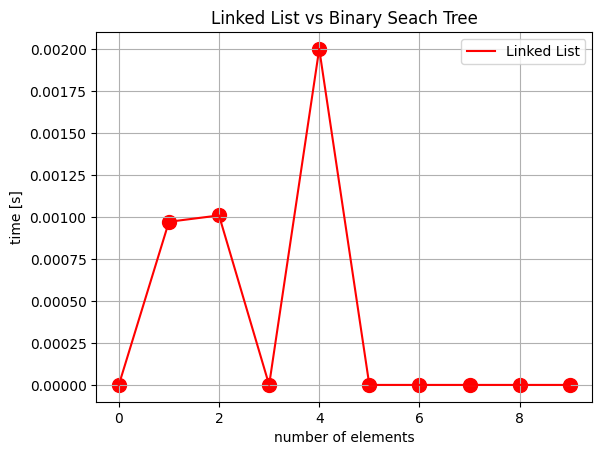

"\nfig, ax = plt.subplots(1, 1)\nax.plot(x[:10], linked_list[:10], color='red', label='Linked List')\nax.plot(x[:10], bst[:10], color='green', label='Binary Search Tree')\n\nplt.scatter(x[:10], linked_list[:10], s=100, c='red', marker='o')#\nplt.scatter(x[:10], bst[:10], s=100, c='green', marker='o')#\n\nplt.title('Linked List vs Binary Search Tree')\nplt.xlabel('number of elements')\nplt.ylabel('time [s]')\nplt.legend()\nplt.grid(True)\nplt.show()\n"

In [5]:
'''
Measure how much time it takes to check existence of an element depending on the number
of them. All your results should be presented using graphs.
'''
import matplotlib.pyplot as plt
import numpy as np

# Load and rearrange the data
linked_list = np.loadtxt('linked_list.txt', delimiter=' ')
bst = np.loadtxt('bst.txt', delimiter=' ')
x = np.arange(len(linked_list))

# Plot: Linked List vs Binary Search Tree
fig, ax = plt.subplots(1, 1)
ax.plot(x, linked_list, color='red', label='Linked List')
ax.plot(x, bst, color='green', label='Binary Search Tree')

plt.scatter(x, linked_list, s=100, c='red', marker='o')
plt.scatter(x, bst, s=100, c='green', marker='o')

plt.title('Linked List vs Binary Seach Tree')
plt.xlabel('number of elements')
plt.ylabel('time [s]')
plt.legend()
plt.grid(True)
plt.show()


# Plot: Linked List
'''
fig, ax = plt.subplots(1, 1)
ax.plot(x[:10], linked_list[:10], color='red', label='Linked List')
ax.plot(x[:10], bst[:10], color='green', label='Binary Search Tree')

plt.scatter(x[:10], linked_list[:10], s=100, c='red', marker='o')#
plt.scatter(x[:10], bst[:10], s=100, c='green', marker='o')#

plt.title('Linked List vs Binary Search Tree')
plt.xlabel('number of elements')
plt.ylabel('time [s]')
plt.legend()
plt.grid(True)
plt.show()
'''

# Plot: Binary Search Tree
plt.plot(results['n'],results['r'])
plt.xlabel("Number of tree nodes")
plt.ylabel("Total execution time (ms)")
plt.title("Time to check existence of node in n-node BST (time for 10000 attempts)")
plt.show()

generating data of size 1000...


100%|██████████| 1000/1000 [00:00<00:00, 999834.09it/s]


creating tree...


100%|██████████| 1000/1000 [00:00<00:00, 658136.51it/s]


15.4759
generating data of size 2000...


100%|██████████| 2000/2000 [00:00<00:00, 1809839.91it/s]


creating tree...


100%|██████████| 2000/2000 [00:00<00:00, 668095.57it/s]


19.0096
generating data of size 3000...


100%|██████████| 3000/3000 [00:00<00:00, 1000072.48it/s]


creating tree...


100%|██████████| 3000/3000 [00:00<00:00, 539853.78it/s]


19.9092
generating data of size 4000...


100%|██████████| 4000/4000 [00:00<00:00, 943865.88it/s]


creating tree...


100%|██████████| 4000/4000 [00:00<00:00, 443407.67it/s]


17.1978
generating data of size 5000...


100%|██████████| 5000/5000 [00:00<00:00, 581202.23it/s]


creating tree...


100%|██████████| 5000/5000 [00:00<00:00, 437937.64it/s]

22.5186


generating data of size 6000...


100%|██████████| 6000/6000 [00:00<00:00, 854266.06it/s]


creating tree...


100%|██████████| 6000/6000 [00:00<00:00, 398578.12it/s]


19.2857
generating data of size 7000...


100%|██████████| 7000/7000 [00:00<00:00, 1750022.53it/s]


creating tree...


100%|██████████| 7000/7000 [00:00<00:00, 685327.79it/s]


21.0232
generating data of size 8000...


100%|██████████| 8000/8000 [00:00<00:00, 1223007.44it/s]


creating tree...


100%|██████████| 8000/8000 [00:00<00:00, 581936.04it/s]


18.5931
generating data of size 9000...


100%|██████████| 9000/9000 [00:00<00:00, 1433079.08it/s]


creating tree...


100%|██████████| 9000/9000 [00:00<00:00, 147586.87it/s]


17.4816
generating data of size 10000...


100%|██████████| 10000/10000 [00:00<00:00, 1536543.94it/s]


creating tree...


100%|██████████| 10000/10000 [00:00<00:00, 519289.84it/s]


25.0259
generating data of size 11000...


100%|██████████| 11000/11000 [00:00<00:00, 1369263.81it/s]


creating tree...


100%|██████████| 11000/11000 [00:00<00:00, 402408.52it/s]


34.4005
generating data of size 12000...


100%|██████████| 12000/12000 [00:00<00:00, 1016903.69it/s]


creating tree...


100%|██████████| 12000/12000 [00:00<00:00, 458427.28it/s]


38.1474
generating data of size 13000...


100%|██████████| 13000/13000 [00:00<00:00, 942556.52it/s]


creating tree...


100%|██████████| 13000/13000 [00:00<00:00, 466524.23it/s]


32.9293
generating data of size 14000...


100%|██████████| 14000/14000 [00:00<00:00, 1202593.92it/s]


creating tree...


100%|██████████| 14000/14000 [00:00<00:00, 442087.38it/s]


38.7513
generating data of size 15000...


100%|██████████| 15000/15000 [00:00<00:00, 1401090.33it/s]


creating tree...


100%|██████████| 15000/15000 [00:00<00:00, 418568.15it/s]


31.5849
generating data of size 16000...


100%|██████████| 16000/16000 [00:00<00:00, 1364500.51it/s]


creating tree...


100%|██████████| 16000/16000 [00:00<00:00, 142359.56it/s]


22.7632
generating data of size 17000...


100%|██████████| 17000/17000 [00:00<00:00, 1288107.09it/s]


creating tree...


100%|██████████| 17000/17000 [00:00<00:00, 392565.09it/s]


36.9387
generating data of size 18000...


100%|██████████| 18000/18000 [00:00<00:00, 1631636.92it/s]


creating tree...


100%|██████████| 18000/18000 [00:00<00:00, 379361.41it/s]


38.4907
generating data of size 19000...


100%|██████████| 19000/19000 [00:00<00:00, 1142731.02it/s]


creating tree...


100%|██████████| 19000/19000 [00:00<00:00, 405950.70it/s]


33.7035
generating data of size 20000...


100%|██████████| 20000/20000 [00:00<00:00, 1416157.34it/s]


creating tree...


100%|██████████| 20000/20000 [00:00<00:00, 333303.19it/s]


29.8358
generating data of size 21000...


100%|██████████| 21000/21000 [00:00<00:00, 1602189.80it/s]


creating tree...


100%|██████████| 21000/21000 [00:00<00:00, 151062.36it/s]


34.3808
generating data of size 22000...


100%|██████████| 22000/22000 [00:00<00:00, 1689888.80it/s]


creating tree...


100%|██████████| 22000/22000 [00:00<00:00, 394343.01it/s]


33.9334
generating data of size 23000...


100%|██████████| 23000/23000 [00:00<00:00, 1019595.12it/s]


creating tree...


100%|██████████| 23000/23000 [00:00<00:00, 395040.92it/s]


27.1947
generating data of size 24000...


100%|██████████| 24000/24000 [00:00<00:00, 1642141.86it/s]


creating tree...


100%|██████████| 24000/24000 [00:00<00:00, 329891.09it/s]


30.9928
generating data of size 25000...


100%|██████████| 25000/25000 [00:00<00:00, 1653905.36it/s]


creating tree...


100%|██████████| 25000/25000 [00:00<00:00, 159601.34it/s]


35.3997
generating data of size 26000...


100%|██████████| 26000/26000 [00:00<00:00, 1627883.33it/s]


creating tree...


100%|██████████| 26000/26000 [00:00<00:00, 334254.61it/s]


26.3934
generating data of size 27000...


100%|██████████| 27000/27000 [00:00<00:00, 1229961.10it/s]


creating tree...


100%|██████████| 27000/27000 [00:00<00:00, 358488.66it/s]


40.0564
generating data of size 28000...


100%|██████████| 28000/28000 [00:00<00:00, 1139203.72it/s]


creating tree...


100%|██████████| 28000/28000 [00:00<00:00, 374988.86it/s]


28.7806
generating data of size 29000...


100%|██████████| 29000/29000 [00:00<00:00, 1722409.21it/s]


creating tree...


100%|██████████| 29000/29000 [00:00<00:00, 167457.57it/s]


45.5076
generating data of size 30000...


100%|██████████| 30000/30000 [00:00<00:00, 910327.58it/s]


creating tree...


100%|██████████| 30000/30000 [00:00<00:00, 275443.32it/s]


37.9373
generating data of size 31000...


100%|██████████| 31000/31000 [00:00<00:00, 1720819.81it/s]


creating tree...


100%|██████████| 31000/31000 [00:00<00:00, 392855.62it/s]


37.1834
generating data of size 32000...


100%|██████████| 32000/32000 [00:00<00:00, 1367183.06it/s]


creating tree...


100%|██████████| 32000/32000 [00:00<00:00, 181568.90it/s]


32.8661
generating data of size 33000...


100%|██████████| 33000/33000 [00:00<00:00, 1595086.45it/s]


creating tree...


100%|██████████| 33000/33000 [00:00<00:00, 383025.56it/s]


40.9071
generating data of size 34000...


100%|██████████| 34000/34000 [00:00<00:00, 1262673.42it/s]


creating tree...


100%|██████████| 34000/34000 [00:00<00:00, 359865.29it/s]


34.4237
generating data of size 35000...


100%|██████████| 35000/35000 [00:00<00:00, 1324246.23it/s]


creating tree...


100%|██████████| 35000/35000 [00:00<00:00, 178617.62it/s]


29.962
generating data of size 36000...


100%|██████████| 36000/36000 [00:00<00:00, 1046824.02it/s]


creating tree...


100%|██████████| 36000/36000 [00:00<00:00, 327130.52it/s]


39.7347
generating data of size 37000...


100%|██████████| 37000/37000 [00:00<00:00, 1362647.93it/s]


creating tree...


100%|██████████| 37000/37000 [00:00<00:00, 202238.13it/s]


38.743
generating data of size 38000...


100%|██████████| 38000/38000 [00:00<00:00, 1344090.13it/s]


creating tree...


100%|██████████| 38000/38000 [00:00<00:00, 392146.30it/s]


30.6454
generating data of size 39000...


100%|██████████| 39000/39000 [00:00<00:00, 1292176.03it/s]


creating tree...


100%|██████████| 39000/39000 [00:00<00:00, 351548.99it/s]


37.2561
generating data of size 40000...


100%|██████████| 40000/40000 [00:00<00:00, 1236865.60it/s]


creating tree...


100%|██████████| 40000/40000 [00:00<00:00, 177781.24it/s]


36.2516
generating data of size 41000...


100%|██████████| 41000/41000 [00:00<00:00, 1223403.32it/s]


creating tree...


100%|██████████| 41000/41000 [00:00<00:00, 359107.37it/s]


43.2565
generating data of size 42000...


100%|██████████| 42000/42000 [00:00<00:00, 1260298.68it/s]


creating tree...


100%|██████████| 42000/42000 [00:00<00:00, 198061.19it/s]


40.3694
generating data of size 43000...


100%|██████████| 43000/43000 [00:00<00:00, 1089409.87it/s]


creating tree...


100%|██████████| 43000/43000 [00:00<00:00, 373946.35it/s]


38.7114
generating data of size 44000...


100%|██████████| 44000/44000 [00:00<00:00, 1538552.53it/s]


creating tree...


100%|██████████| 44000/44000 [00:00<00:00, 190671.85it/s]


45.0575
generating data of size 45000...


100%|██████████| 45000/45000 [00:00<00:00, 928842.98it/s]


creating tree...


100%|██████████| 45000/45000 [00:00<00:00, 370376.86it/s]


36.1933
generating data of size 46000...


100%|██████████| 46000/46000 [00:00<00:00, 1252941.68it/s]


creating tree...


100%|██████████| 46000/46000 [00:00<00:00, 182781.37it/s]


28.9618
generating data of size 47000...


100%|██████████| 47000/47000 [00:00<00:00, 1535752.70it/s]


creating tree...


100%|██████████| 47000/47000 [00:00<00:00, 340603.81it/s]


33.4956
generating data of size 48000...


100%|██████████| 48000/48000 [00:00<00:00, 1555931.09it/s]


creating tree...


100%|██████████| 48000/48000 [00:00<00:00, 228514.05it/s]


37.1843
generating data of size 49000...


100%|██████████| 49000/49000 [00:00<00:00, 1499835.04it/s]


creating tree...


100%|██████████| 49000/49000 [00:00<00:00, 294928.46it/s]


43.1844
generating data of size 50000...


100%|██████████| 50000/50000 [00:00<00:00, 1552698.33it/s]


creating tree...


100%|██████████| 50000/50000 [00:00<00:00, 189035.65it/s]


38.7248
generating data of size 51000...


100%|██████████| 51000/51000 [00:00<00:00, 1261191.94it/s]


creating tree...


100%|██████████| 51000/51000 [00:00<00:00, 371212.13it/s]


36.5097
generating data of size 52000...


100%|██████████| 52000/52000 [00:00<00:00, 1664215.85it/s]


creating tree...


100%|██████████| 52000/52000 [00:00<00:00, 191082.79it/s]


35.1968
generating data of size 53000...


100%|██████████| 53000/53000 [00:00<00:00, 1373007.25it/s]


creating tree...


100%|██████████| 53000/53000 [00:00<00:00, 335991.12it/s]


32.9519
generating data of size 54000...


100%|██████████| 54000/54000 [00:00<00:00, 1536885.93it/s]


creating tree...


100%|██████████| 54000/54000 [00:00<00:00, 196239.37it/s]


41.4625
generating data of size 55000...


100%|██████████| 55000/55000 [00:00<00:00, 1325671.47it/s]


creating tree...


100%|██████████| 55000/55000 [00:00<00:00, 211574.56it/s]


42.4668
generating data of size 56000...


100%|██████████| 56000/56000 [00:00<00:00, 1600661.20it/s]


creating tree...


100%|██████████| 56000/56000 [00:00<00:00, 262437.19it/s]


40.5186
generating data of size 57000...


100%|██████████| 57000/57000 [00:00<00:00, 1139664.16it/s]


creating tree...


100%|██████████| 57000/57000 [00:00<00:00, 206699.74it/s]


32.9292
generating data of size 58000...


100%|██████████| 58000/58000 [00:00<00:00, 1535541.09it/s]


creating tree...


100%|██████████| 58000/58000 [00:00<00:00, 316315.40it/s]


34.7153
generating data of size 59000...


100%|██████████| 59000/59000 [00:00<00:00, 1581087.67it/s]


creating tree...


100%|██████████| 59000/59000 [00:00<00:00, 212670.05it/s]


42.0909
generating data of size 60000...


100%|██████████| 60000/60000 [00:00<00:00, 1349851.64it/s]


creating tree...


100%|██████████| 60000/60000 [00:00<00:00, 221496.41it/s]


48.0219
generating data of size 61000...


100%|██████████| 61000/61000 [00:00<00:00, 1464273.70it/s]


creating tree...


100%|██████████| 61000/61000 [00:00<00:00, 373637.18it/s]


36.4878
generating data of size 62000...


100%|██████████| 62000/62000 [00:00<00:00, 1721491.92it/s]


creating tree...


100%|██████████| 62000/62000 [00:00<00:00, 217511.77it/s]


35.8696
generating data of size 63000...


100%|██████████| 63000/63000 [00:00<00:00, 1405403.48it/s]


creating tree...


100%|██████████| 63000/63000 [00:00<00:00, 259175.57it/s]


35.1578
generating data of size 64000...


100%|██████████| 64000/64000 [00:00<00:00, 1398771.58it/s]


creating tree...


100%|██████████| 64000/64000 [00:00<00:00, 273451.37it/s]


49.932
generating data of size 65000...


100%|██████████| 65000/65000 [00:00<00:00, 1277301.37it/s]


creating tree...


100%|██████████| 65000/65000 [00:00<00:00, 193701.73it/s]


41.7139
generating data of size 66000...


100%|██████████| 66000/66000 [00:00<00:00, 1121026.59it/s]


creating tree...


100%|██████████| 66000/66000 [00:00<00:00, 227281.29it/s]


41.1133
generating data of size 67000...


100%|██████████| 67000/67000 [00:00<00:00, 1104046.08it/s]


creating tree...


100%|██████████| 67000/67000 [00:00<00:00, 207243.44it/s]


46.3993
generating data of size 68000...


100%|██████████| 68000/68000 [00:00<00:00, 1153660.94it/s]


creating tree...


100%|██████████| 68000/68000 [00:00<00:00, 275203.79it/s]


43.9757
generating data of size 69000...


100%|██████████| 69000/69000 [00:00<00:00, 1010661.54it/s]


creating tree...


100%|██████████| 69000/69000 [00:00<00:00, 183990.17it/s]


43.7461
generating data of size 70000...


100%|██████████| 70000/70000 [00:00<00:00, 1203673.65it/s]


creating tree...


100%|██████████| 70000/70000 [00:00<00:00, 213657.17it/s]


45.268
generating data of size 71000...


100%|██████████| 71000/71000 [00:00<00:00, 1288639.57it/s]


creating tree...


100%|██████████| 71000/71000 [00:00<00:00, 216669.37it/s]


46.6485
generating data of size 72000...


100%|██████████| 72000/72000 [00:00<00:00, 1191140.65it/s]


creating tree...


100%|██████████| 72000/72000 [00:00<00:00, 280095.65it/s]


43.1236
generating data of size 73000...


100%|██████████| 73000/73000 [00:00<00:00, 1153796.73it/s]


creating tree...


100%|██████████| 73000/73000 [00:00<00:00, 201880.31it/s]


40.1725
generating data of size 74000...


100%|██████████| 74000/74000 [00:00<00:00, 1335679.38it/s]


creating tree...


100%|██████████| 74000/74000 [00:00<00:00, 220494.24it/s]


45.1438
generating data of size 75000...


100%|██████████| 75000/75000 [00:00<00:00, 1390131.25it/s]


creating tree...


100%|██████████| 75000/75000 [00:00<00:00, 226958.44it/s]


59.6409
generating data of size 76000...


100%|██████████| 76000/76000 [00:00<00:00, 1242848.80it/s]


creating tree...


100%|██████████| 76000/76000 [00:00<00:00, 209451.18it/s]


40.8163
generating data of size 77000...


100%|██████████| 77000/77000 [00:00<00:00, 1143740.40it/s]


creating tree...


100%|██████████| 77000/77000 [00:00<00:00, 284007.01it/s]


43.027
generating data of size 78000...


100%|██████████| 78000/78000 [00:00<00:00, 1335542.03it/s]


creating tree...


100%|██████████| 78000/78000 [00:00<00:00, 206598.09it/s]


37.859
generating data of size 79000...


100%|██████████| 79000/79000 [00:00<00:00, 1299794.12it/s]


creating tree...


100%|██████████| 79000/79000 [00:00<00:00, 222294.09it/s]


47.8696
generating data of size 80000...


100%|██████████| 80000/80000 [00:00<00:00, 1176056.89it/s]


creating tree...


100%|██████████| 80000/80000 [00:00<00:00, 198414.38it/s]


45.7625
generating data of size 81000...


100%|██████████| 81000/81000 [00:00<00:00, 1247878.35it/s]


creating tree...


100%|██████████| 81000/81000 [00:00<00:00, 198660.71it/s]


49.684
generating data of size 82000...


100%|██████████| 82000/82000 [00:00<00:00, 1321081.22it/s]


creating tree...


100%|██████████| 82000/82000 [00:00<00:00, 214774.18it/s]


43.4085
generating data of size 83000...


100%|██████████| 83000/83000 [00:00<00:00, 1201395.70it/s]


creating tree...


100%|██████████| 83000/83000 [00:00<00:00, 203222.13it/s]


44.419
generating data of size 84000...


100%|██████████| 84000/84000 [00:00<00:00, 1118062.24it/s]


creating tree...


100%|██████████| 84000/84000 [00:00<00:00, 278135.99it/s]


40.361
generating data of size 85000...


100%|██████████| 85000/85000 [00:00<00:00, 1193066.93it/s]


creating tree...


100%|██████████| 85000/85000 [00:00<00:00, 193399.77it/s]


43.8252
generating data of size 86000...


100%|██████████| 86000/86000 [00:00<00:00, 1231555.00it/s]


creating tree...


100%|██████████| 86000/86000 [00:00<00:00, 216659.78it/s]


53.9064
generating data of size 87000...


100%|██████████| 87000/87000 [00:00<00:00, 1084546.80it/s]


creating tree...


100%|██████████| 87000/87000 [00:00<00:00, 210093.73it/s]


41.2529
generating data of size 88000...


100%|██████████| 88000/88000 [00:00<00:00, 1300843.57it/s]


creating tree...


100%|██████████| 88000/88000 [00:00<00:00, 208789.05it/s]


46.3983
generating data of size 89000...


100%|██████████| 89000/89000 [00:00<00:00, 1158162.22it/s]


creating tree...


100%|██████████| 89000/89000 [00:00<00:00, 226565.84it/s]


53.8796
generating data of size 90000...


100%|██████████| 90000/90000 [00:00<00:00, 1313081.72it/s]


creating tree...


100%|██████████| 90000/90000 [00:00<00:00, 218246.83it/s]


43.7254
generating data of size 91000...


100%|██████████| 91000/91000 [00:00<00:00, 1295113.70it/s]


creating tree...


100%|██████████| 91000/91000 [00:00<00:00, 223094.50it/s]


55.1513
generating data of size 92000...


100%|██████████| 92000/92000 [00:00<00:00, 1324759.57it/s]


creating tree...


100%|██████████| 92000/92000 [00:00<00:00, 208041.48it/s]


36.3547
generating data of size 93000...


100%|██████████| 93000/93000 [00:00<00:00, 1241925.82it/s]


creating tree...


100%|██████████| 93000/93000 [00:00<00:00, 215640.80it/s]


47.131
generating data of size 94000...


100%|██████████| 94000/94000 [00:00<00:00, 1261949.51it/s]


creating tree...


100%|██████████| 94000/94000 [00:00<00:00, 217134.98it/s]


41.7009
generating data of size 95000...


100%|██████████| 95000/95000 [00:00<00:00, 1367643.67it/s]


creating tree...


100%|██████████| 95000/95000 [00:00<00:00, 210411.44it/s]


46.1037
generating data of size 96000...


100%|██████████| 96000/96000 [00:00<00:00, 962842.87it/s]


creating tree...


100%|██████████| 96000/96000 [00:00<00:00, 221139.72it/s]


41.0178
generating data of size 97000...


100%|██████████| 97000/97000 [00:00<00:00, 1267354.75it/s]


creating tree...


100%|██████████| 97000/97000 [00:00<00:00, 194439.19it/s]


50.8264
generating data of size 98000...


100%|██████████| 98000/98000 [00:00<00:00, 958639.92it/s]


creating tree...


100%|██████████| 98000/98000 [00:00<00:00, 188971.00it/s]


41.6687
generating data of size 99000...


100%|██████████| 99000/99000 [00:00<00:00, 1338202.14it/s]


creating tree...


100%|██████████| 99000/99000 [00:00<00:00, 225425.78it/s]


40.5686


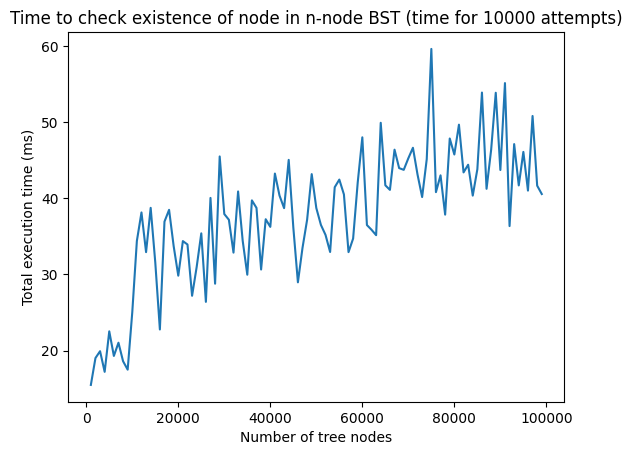